In [123]:
import numpy as np
import pandas as pd
import matplotlib as mpl

In [124]:
data_orig = pd.read_csv('cpcb_data.csv')

keep1 = data_orig['PM25'] != 'None'
keep2 = data_orig['PM10'] != 'None'
keep3 = data_orig['NO2'] != 'None'
keep4 = data_orig['SO2'] != 'None'
keep5 = data_orig['Ozone'] != 'None'
data = data_orig[keep1 & keep2 & keep3 & keep4 & keep5]
data.head()

,FromDate,ToDate,PM25,PM10,NO2,SO2,Ozone
2,1/1/20 2:00,1/1/20 3:00,596.5,991,4.18,14.3,17.55
3,1/1/20 3:00,1/1/20 4:00,548,971.75,3.85,11.4,18.38
4,1/1/20 4:00,1/1/20 5:00,548.75,899.75,3.2,11.43,27.07
5,1/1/20 5:00,1/1/20 6:00,479.75,836.25,5.57,10.6,25.02
6,1/1/20 6:00,1/1/20 7:00,462,787.25,6.05,10.52,22.88


In [125]:
data.index = pd.to_datetime(data['FromDate'])
data.head()

,FromDate,ToDate,PM25,PM10,NO2,SO2,Ozone
FromDate,,,,,,,
2020-01-01 02:00:00,1/1/20 2:00,1/1/20 3:00,596.5,991,4.18,14.3,17.55
2020-01-01 03:00:00,1/1/20 3:00,1/1/20 4:00,548,971.75,3.85,11.4,18.38
2020-01-01 04:00:00,1/1/20 4:00,1/1/20 5:00,548.75,899.75,3.2,11.43,27.07
2020-01-01 05:00:00,1/1/20 5:00,1/1/20 6:00,479.75,836.25,5.57,10.6,25.02
2020-01-01 06:00:00,1/1/20 6:00,1/1/20 7:00,462,787.25,6.05,10.52,22.88


In [126]:
data = data.astype({'PM25': 'float', 'PM10': 'float', 'NO2': 'float', 'SO2': 'float', 'Ozone': 'float'})
data.head()

,FromDate,ToDate,PM25,PM10,NO2,SO2,Ozone
FromDate,,,,,,,
2020-01-01 02:00:00,1/1/20 2:00,1/1/20 3:00,596.50,991.00,4.18,14.30,17.55
2020-01-01 03:00:00,1/1/20 3:00,1/1/20 4:00,548.00,971.75,3.85,11.40,18.38
2020-01-01 04:00:00,1/1/20 4:00,1/1/20 5:00,548.75,899.75,3.20,11.43,27.07
2020-01-01 05:00:00,1/1/20 5:00,1/1/20 6:00,479.75,836.25,5.57,10.60,25.02
2020-01-01 06:00:00,1/1/20 6:00,1/1/20 7:00,462.00,787.25,6.05,10.52,22.88


In [127]:
mth_mean_PM25 = data['PM25'].resample('M').mean()
mth_mean_PM10 = data['PM10'].resample('M').mean()
mth_mean_SO2 = data['SO2'].resample('M').mean()
mth_mean_NO2 = data['NO2'].resample('M').mean()
mth_mean_Ozone = data['Ozone'].resample('M').mean()

In [128]:
mth_mean_PM25.head()

FromDate
2020-01-31    108.064843
2020-02-29     83.549689
2020-03-31     58.230631
2020-04-30     89.114329
2020-05-31     57.094322
Freq: M, Name: PM25, dtype: float64

In [129]:
mth_means = {'PM25': mth_mean_PM25, 'PM10': mth_mean_PM10, 'NO2': mth_mean_NO2, 'SO2': mth_mean_SO2, \
          'Ozone': mth_mean_Ozone}
mth_df = pd.DataFrame(data=mth_means, dtype=np.float64)
mth_df.head()

,PM25,PM10,NO2,SO2,Ozone
FromDate,,,,,
2020-01-31,108.064843,208.054348,40.808156,12.793973,25.141274
2020-02-29,83.549689,194.290761,47.138727,12.232205,25.909798
2020-03-31,58.230631,133.311693,40.533874,13.794433,39.948838
2020-04-30,89.114329,173.833079,39.514604,13.267500,42.558049
2020-05-31,57.094322,126.530678,36.615256,15.628626,41.946813


array([<AxesSubplot:xlabel='FromDate'>, <AxesSubplot:xlabel='FromDate'>,
       <AxesSubplot:xlabel='FromDate'>, <AxesSubplot:xlabel='FromDate'>,
       <AxesSubplot:xlabel='FromDate'>], dtype=object)

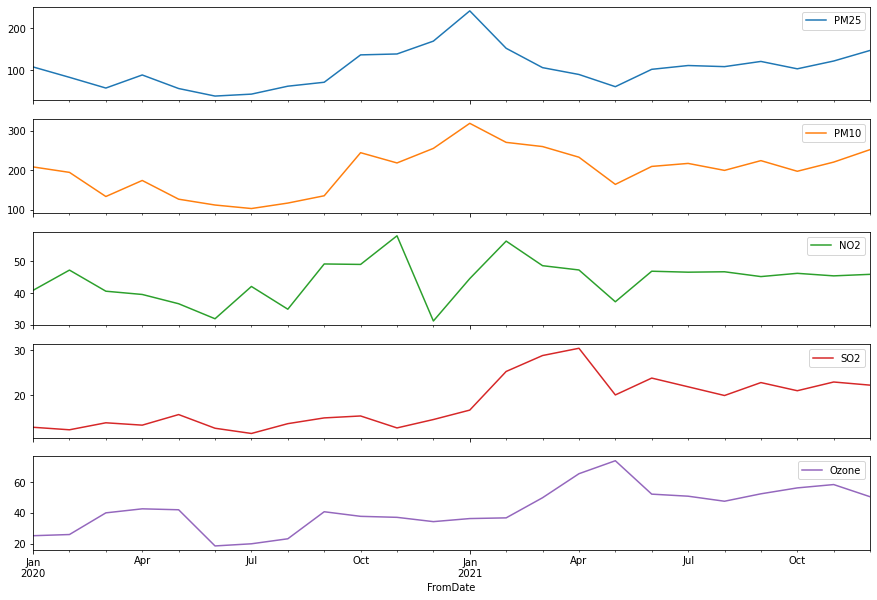

In [130]:
mth_df.plot(subplots=True, figsize=(15,10))